# MultiVariate Linear Regression

## Creating My Own Multiple_Linear_Regression

In [1]:
# Import Libraries : Numpy, Pandas, matplotlib.pyplot, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

class Multi_Variate_Linear_Regression:
    
    '''
    Step 1: Add one more column with 1 as values to the Independent variable (X)
    Step 2: Randomly choose weightage for each column in Independent Variable column
    Step 3: 
    '''
    
    def __init__(self, 
                 visualization = False, 
                 error_metrics = True ):
        self.visualization = visualization                           # Setting Visualization to plot or not
        self.error_metrics = error_metrics                           # Setting error metrics to print or not
            
    def validate_data(self, X, y):
        if X.shape[0] != y.shape[0]:
            raise Exception('Shape does no match. Got shape of {} and {}'.format(X.shape, y.shape))
        elif X.ndim != 2:
            raise Exception('Independent column must have 2 Dimensions. Got dimension of {}'. format(X.ndim))
        elif y.ndim != 1:
            raise Exception('Dependent column must have 1 Dimensions. Got dimension of {}'. format(y.ndim))
        else:
            pass
    
    def fit(self, X, y, random_seed = 42):
        
        # Validating the Training Data
        self.validate_data(X, y)
        
        # Calculating Number of Features and Records
        self._m_records, self._n_features = X.shape
        
        # Step 1: Initializing Independent and Dependent variables columns
        self.X_old = X
        self.X = np.hstack((np.ones((self._m_records, 1)), X))
        self.y = y.reshape(-1, 1)
        
        # Step 2: Randomly choosing a weight for each column in Independent variable column & Constant column
        #np.random.seed(random_seed)
        #self._weights = np.random.randn(1, self._n_features)
        self._weights = np.hstack((1, np.mean(X, axis = 0))).reshape(1, -1) / 1000
        
        
        # Step 3: Initializing costs lists to know the cost at each learning rate
        self._costs = []
        
        # Step 4: Initializing Learning rate
        learning_rate = np.max(X) / 50
        # iterations = {}
        
        
        for i in range(20):
            # print('Iterations : ', i+1, 'Learning Rate : ', learning_rate)
            # n_iter = 0
            s_cost = []
            while True:
                
                # Step 5: Find the predictions for the weights
                Hypothesis = np.dot(self._weights, self.X.T)
                
                # Step 6: Find the error given by the predictions
                error = (Hypothesis - y)
                
                # Step 7: Find the cost for previous predictions
                cost = np.sum(error**2) / 2
                
                if len(s_cost) == 0:
                    pass
                else:
                    if round(cost, (3*i)//4) >= round(s_cost[-1], (3*i)//4):
                        break
                s_cost.append(cost)
                mae = self.mean_absolute_error(y, Hypothesis)

                # Step 7: Multiply the error by learning rate
                updater = learning_rate * error
                prev_weights = self._weights
                
                # Step 8 : Updating to the new weight
                self._weights = self._weights - np.dot(updater, self.X)
                
                
                # n_iter += 1
            
            self._weights = prev_weights
            # print(s_cost[-1])
            self._costs.extend(s_cost)
            # iterations[i] = n_iter
            learning_rate = learning_rate / 10
        
        self.intercept = self._weights[0][0]
        self.coefficient = self._weights[0][1:]
        # print('Iterations : \n\t\t {}'.format(iterations))
        
        if self.error_metrics:
            print('R2 score : \t {}'.format(self.r2_score()))
        
        if self.visualization:
            self.plot_cost_function()
        return self.intercept, self.coefficient
    
    def mean_absolute_error(self, y_true, y_pred):
        return np.sum(np.abs(y_true - y_pred)) / len(y_true)
    
    def plot_cost_function(self):
        x_axis = list(range(1, len(self._costs)+1))
        y_axis = self._costs
        
        plt.figure(figsize = (8, 6))
        plt.plot(x_axis, y_axis)
        plt.title('Cost Function Plot')
        plt.xlabel('Epochs', fontsize = 20)
        plt.ylabel('Costs', fontsize = 20)
        plt.show()
        
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
        
        _y_pred = np.dot(self._weights, self.X.T)
        
        self._y_mean = np.mean(self.y)
        
        line_1_sum = np.sum((self.y - _y_pred.T) ** 2)
        line_2_sum = np.sum((self.y - self._y_mean) ** 2)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        return r2_score

<br><br><br><br><br><br><br><br>

# Exam Score Dataset

In [2]:
exam = pd.read_excel('mlr03.xls')
exam.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [3]:
X = exam.iloc[:, [0, 1, 2]].values
y = exam.iloc[:, 3].values

## Using My Own Multi Variate Linear Regression class

R2 score : 	 0.9890006054799901


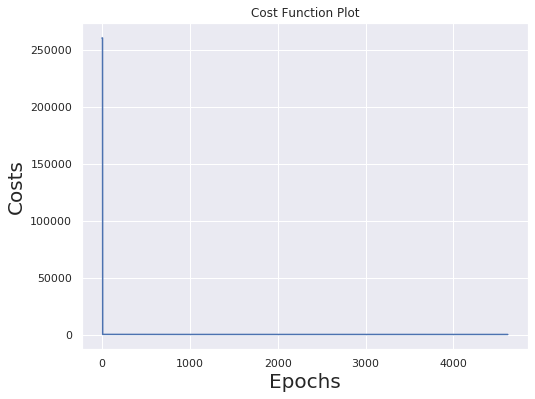

(-0.007219911665453429, array([0.37301053, 0.52324764, 1.11755921]))

In [4]:
own_exam_regressor = Multi_Variate_Linear_Regression(visualization=True, error_metrics=True)
own_exam_regressor.fit(X, y)

In [5]:
own_exam_regressor.intercept

-0.007219911665453429

In [6]:
own_exam_regressor.coefficient

array([0.37301053, 0.52324764, 1.11755921])

In [7]:
own_exam_regressor.r2_score()

0.9890006054799901

<br><br><br>

## Using Sklearn

In [8]:
from sklearn.linear_model import LinearRegression
skl_exam_regressor = LinearRegression()
skl_exam_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
skl_exam_regressor.intercept_

-4.336102401240339

In [10]:
skl_exam_regressor.coef_

array([0.35593822, 0.54251876, 1.16744422])

In [11]:
from sklearn.metrics import r2_score
r2_score(y, skl_exam_regressor.predict(X))

0.9896615789448399

<br><br><br><br><br><br><br><br><br><br><br>

# Salary DataSet

In [12]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
X = salary.iloc[:, [0]].values
y = salary.iloc[:, 1].values

## Using My Own Multi Variate Linear Regression class

R2 score : 	 0.9569566638148764


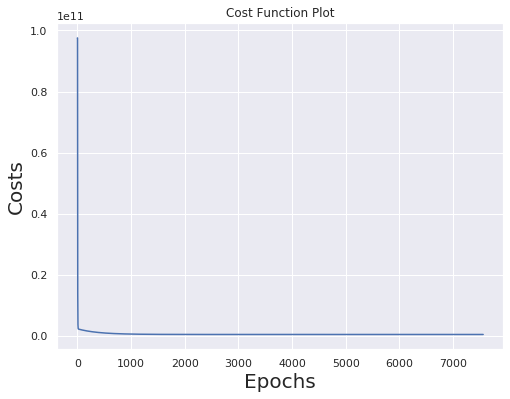

(25791.14929420419, array([9450.11827128]))

In [14]:
own_sal_regressor = Multi_Variate_Linear_Regression(visualization=True)
own_sal_regressor.fit(X, y)

In [15]:
own_sal_regressor.r2_score()

0.9569566638148764

## Using Sklearn

In [16]:
from sklearn.linear_model import LinearRegression
skl_sal_regressor = LinearRegression()
skl_sal_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
skl_sal_regressor.coef_, skl_sal_regressor.intercept_

(array([9449.96232146]), 25792.200198668717)

In [18]:
from sklearn.metrics import r2_score
r2_score(y, skl_sal_regressor.predict(X))

0.9569566641435086